In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
from tidy3d.load_data import load_hdf5
import numpy as np
import matplotlib.pylab as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# view data of all monitors in a dictionary of xarray.datasets
sim_data = load_hdf5('../out/monitor_field.hdf5')
sim_data.keys()

dict_keys(['xy plane bot', 'xy plane bot layer', 'xy plane top', 'xy plane top layer'])

In [3]:
# view xarray.dataset of single monitor
top_dataset = sim_data['xy plane top']
top_dataset

<xarray.Dataset>
Dimensions:    (component: 3, xmesh: 250, ymesh: 250, zmesh: 1, freqs: 21)
Coordinates:
  * component  (component) <U1 'x' 'y' 'z'
  * xmesh      (xmesh) float32 -2.49 -2.47 -2.45 -2.43 ... 2.43 2.45 2.47 2.49
  * ymesh      (ymesh) float32 -2.49 -2.47 -2.45 -2.43 ... 2.43 2.45 2.47 2.49
  * zmesh      (zmesh) float32 1.01
  * freqs      (freqs) float32 1.5e+14 1.575e+14 1.65e+14 ... 2.925e+14 3e+14
Data variables:
    E          (component, xmesh, ymesh, zmesh, freqs) complex64 (-8.2414724e...

In [4]:
# view xarray.dataArray of single data variable (E field)
E = top_dataset.E
E

<xarray.DataArray 'E' (component: 3, xmesh: 250, ymesh: 250, zmesh: 1, freqs: 21)>
array([[[[[-8.24147242e-17-1.99454567e-16j,
           -1.22772621e-16-3.30863298e-16j,
           -3.27781137e-17+1.10413678e-15j, ...,
           -2.38165151e-16+3.75178633e-16j,
           -1.40465806e-17-1.07791825e-16j,
           -7.95578872e-17-1.74829288e-17j]],

         [[-8.21769396e-17-1.99213374e-16j,
           -1.22265355e-16-3.30015895e-16j,
           -3.38511490e-17+1.10099301e-15j, ...,
           -2.36803148e-16+3.74199463e-16j,
           -1.60632155e-17-1.07696997e-16j,
           -7.89802571e-17-1.76064996e-17j]],

         [[-8.17373625e-17-1.98824388e-16j,
           -1.21395386e-16-3.28460822e-16j,
           -3.52734562e-17+1.09509713e-15j, ...,
           -2.35121708e-16+3.71815965e-16j,
           -1.95843811e-17-1.07937117e-16j,
           -7.81794271e-17-1.77785152e-17j]],
...
         [[ 2.05156488e-16-3.09516771e-16j,
            2.47765789e-17-2.76773892e-16j,
            7.77683131e-16+2.00787056e-16j, ...,
           -2.04087096e-17-9.58828988e-17j,
            1.02763032e-15-3.45463111e-18j,
            6.29379361e-17-5.10308796e-17j]],

         [[ 1.16633949e-16-2.17588073e-16j,
            2.39649588e-18-1.99264488e-16j,
            5.06685474e-16+1.84223300e-16j, ...,
           -2.67307865e-17-6.57854822e-17j,
            6.19738273e-16-2.76481199e-17j,
            4.35520022e-17-3.48145431e-17j]],

         [[ 2.77810495e-17-1.25151394e-16j,
           -2.00138152e-17-1.21264082e-16j,
            2.34363032e-16+1.67175571e-16j, ...,
           -3.23463387e-17-3.57012509e-17j,
            2.04138395e-16-5.20404966e-17j,
            2.37230404e-17-1.87152773e-17j]]]]], dtype=complex64)
Coordinates:
  * component  (component) <U1 'x' 'y' 'z'
  * xmesh      (xmesh) float32 -2.49 -2.47 -2.45 -2.43 ... 2.43 2.45 2.47 2.49
  * ymesh      (ymesh) float32 -2.49 -2.47 -2.45 -2.43 ... 2.43 2.45 2.47 2.49
  * zmesh      (zmesh) float32 1.01
  * freqs      (freqs) float32 1.5e+14 1.575e+14 1.65e+14 ... 2.925e+14 3e+14

In [54]:
# get dataArray for intensity(x,y) summed over spectrum
I = np.square(np.abs(E)).sum(('component', 'zmesh', 'freqs'))
I

<xarray.DataArray 'E' (xmesh: 250, ymesh: 250)>
array([[3.5069709e-28, 3.5287507e-28, 3.5774002e-28, ..., 3.6067851e-28,
        3.5464673e-28, 3.5129220e-28],
       [3.5281455e-28, 3.5379889e-28, 3.5747581e-28, ..., 3.6628193e-28,
        3.5911610e-28, 3.5459363e-28],
       [3.5758698e-28, 3.5738151e-28, 3.5985428e-28, ..., 3.7445786e-28,
        3.6619796e-28, 3.6053755e-28],
       ...,
       [3.6053493e-28, 3.6619656e-28, 3.7445711e-28, ..., 3.5984908e-28,
        3.5737657e-28, 3.5758407e-28],
       [3.5459233e-28, 3.5911511e-28, 3.6628113e-28, ..., 3.5747058e-28,
        3.5379511e-28, 3.5281130e-28],
       [3.5129119e-28, 3.5464813e-28, 3.6067988e-28, ..., 3.5773542e-28,
        3.5287141e-28, 3.5069684e-28]], dtype=float32)
Coordinates:
  * xmesh    (xmesh) float32 -2.49 -2.47 -2.45 -2.43 ... 2.43 2.45 2.47 2.49
  * ymesh    (ymesh) float32 -2.49 -2.47 -2.45 -2.43 ... 2.43 2.45 2.47 2.49

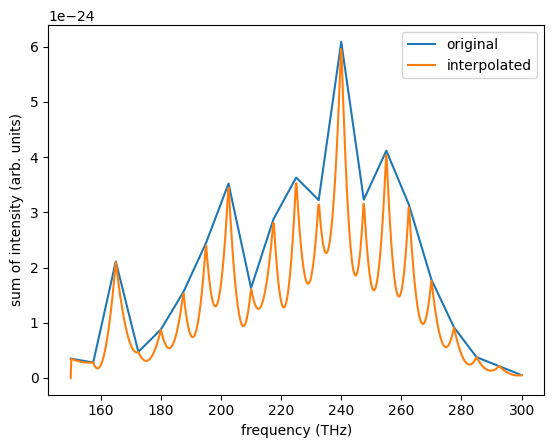

In [60]:
# interpolate sum of intensity over frequency points

freqs_meas = E.freqs.values                    # measured freqs
freqs_fine = 1e14 * np.linspace(1.5, 3, 700)   # interpolate freqs

# store results
l_meas = []
l_fine = []

# get intensity of original fields
for freq in freqs_meas:
    intensity = np.sum(np.square(np.abs(E.sel(freqs=freq))))
    l_meas.append(intensity.values)

# get intensity of interpolated fields
for freq in freqs_fine:
    intensity = np.sum(np.square(np.abs(E.interp(freqs=freq))))
    l_fine.append(intensity.values)

    
plt.clf()
plt.plot(freqs_meas/1e12, l_meas, label='original')
plt.plot(freqs_fine/1e12, l_fine, label='interpolated')
plt.ylabel('sum of intensity (arb. units)')
plt.xlabel('frequency (THz)')
plt.legend()
plt.show()

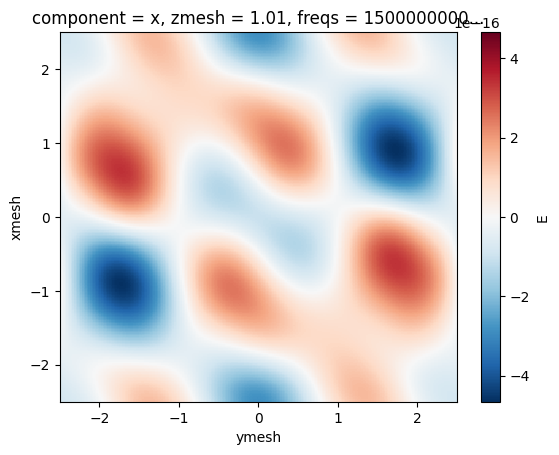

In [62]:
# plot field patterns

Ex_plane = E.sel(component='x', freqs=1.5e14).squeeze()
Ex_plane.real.plot.pcolormesh()
plt.show()